# Question 1

## Part a

To calculate the value of the policies $\pi_{R}$ and $\pi_{W}$ from the initial state 1 under the two reward functions, we need to compute the expected cumulative reward over the horizon $H = 5$.

**Reward function 1:** $r(x,a) = \mathbb{I}\{x = 5\}$ for all $x = 1,...,5$, $F$, $a = R, W$.

**Policy $\pi_{R}$:** From state $1$, the agent needs two successful runs to reach state $5$, this is with probability $0.7 \times 0.7$, and receiving a reward of $1$. With probability $0.7 \times 0.3$, the agent falls after one successful run, receiving no reward. With probability $0.3$, the agent falls on the first run and receives no reward. Therefore, for the value of the policy $\pi_R$ accross the whole episode it follows:
$$
V_{1}^{\pi_R}(x_1) = (0.7 \times 0.7 \times 1) + (0.7 \times 0.3 \times 0) + (0.3 \times 0) = 0.49
$$
**Policy $\pi_W$:** From state $1$, the agent reaches state $5$ with probability $1$ after $4$ walks, receiving a reward of $1$.
$$
V_{1}^{\pi_W}(x_1) = 1.
$$
**Reward function 2:** $r(x,a) = 0.25\mathbb{I}\{x \neq F\} + 0.75\mathbb{I}\{x = 5\}$ for all $x = 1,...,5$, $F$, $a = R, W$.

**Policy $\pi_{R}$:** From state $1$, the agent runs and reaches state $3$ with probability $0.7$, receiving a reward of $0.25$. From state $3$, it runs again and reaches state $5$ with probability $0.7$, receiving a reward of $0.25 + 0.75 = 1$. With probability $0.3$, it falls and receives no reward.
$$
V_{1}^{\pi_R}(x_1) = 0.7 \times (0.25 + 0.7 \times (0.25 + 0.75) + 0.3 \times 0) + 0.3 \times 0 = 0.665
$$
**Policy $\pi_W$:** From state $1$, the agent reaches state $5$ with probability 1 after 4 walks, receiving a reward of $0.25$ for each of the four non-fallen states, and $0.75$ for reaching state 5.
$$
V_1^{\pi_W}(x_1) = 0.25 \times 4 + 0.75 = 1.75
$$

## Part b

**Reward function 1:** The reward function is simple and easy to understand, the agent only receives a reward upon reaching the goal state $5$, and is encouraged to reach the goal state as quickly as possible, as it receives no intermediate rewards. On the other hand, the agent receives no feedback for intermediate progress, which can make learning difficult, especially in more complex environments, because the robot has no incentive to explore potentially more efficient paths. Moreover, the agent may take risky actions (like always running) to reach the goal state quickly because it is not penalized for falling, and hence ignore the potential consequences of falling.

**Reward function 2:** The agent receives intermediate rewards for making progress towards the goal, which can facilitate learning and provide more frequent feedback leading to more exploration and potentially the discovery of more efficient paths to the goal, and also the agent is encouraged to avoid the fallen state. Overall, the robot is encouraged to run if it can increase the expected return, as it receives some reward for making progress, rather than an all-or-nothing approach. On the other hand, if the intermediate rewards are not carefully balanced with the goal reward, the agent might prioritize not falling over reaching the goal efficiently. Moreover, this reward function is slightly more complex than the first one, as it involves two components (not falling and reaching the goal) leading to having to consider the trade-off between them. The function also seems to encourage a more cautious and risk-aware behavior, as the agent is rewarded for not falling while still being motivated to reach the goal. This is evident from the higher value of the $\pi_W$ policy compared to the $\pi_R$ policy.

## Part c

**Reward function 1:** With a shorter horizon, the $\pi_R$ policy would become more attractive. This is because the agent has fewer steps to reach the goal state, and the risk of falling becomes less significant. The value of $\pi_W$ would decrease, as the agent might not have enough time to reach the goal state deterministically.

**Reward function 2:** The shorter horizon might also favor the $\pi_R$ policy. The agent would have a higher chance of reaching the goal state within the limited time, and the intermediate rewards for not falling would have less impact on the total expected reward. However, the exact values of the policies would depend on the specific probabilities and rewards. In general, a shorter horizon would encourage more aggressive, risk-taking behavior, as the agent has less time to reach the goal state and the consequences of falling are less severe.

Let's calculate the value of our policies for $H = 3$:

Reward function 1:
$$
V_1^{\pi_R}(x_1) = 0.7 \times 0.7 = 0.49, \text{ since that is the only way to obtain a reward.}
$$
$$
V_{1}^{\pi_W}(x_1) = 0, \text{ because the robot can't reach state 5 in 3 steps}.
$$
Indeed, $\pi_R$ is higher than $\pi_W$, and there is no time to reach state 5 via walking.

Reward function 2:
$$
V_{1}^{\pi_R}(x_1) = 0.7 \times (0.25 + 0.7 \times (0.25 + 0.75)) = 0.665
$$
$$
V_1^{\pi_W}(x_1) = 3 \times 0.25 = 0.75, \text{ the robot would receive a reward of 0.25 for each step.}
$$
As we can see, with a shorter horizon, the $\pi_R$ policy may become more competitive or even superior to the $\pi_W$ policy, especially under reward function 1. Under reward function 2 $\pi_W$ has a slightly higher expected reward, which suggests that the surety of the walking reward outweighs the potential but uncertain reward from running within the short horizon. This also indicates that the robot under the walking policy is rewarded for each step it takes, which is significant under the shorter horizon.

# Question 2

## Part a

The optimistic Q-function in (2) consists of three terms: the reward $r_{h}(x, a)$, the expected next-state value under the estimated transition function $\sum_{x' \in S} \hat{P}_{h,t}(x' | x, a) V^{+}_{h+1}(x')$, and the bonus term $b_{h,t}(x, a)$. To maximize $V_{h}^{+}(x)$, we need to maximize each of these terms.

- As stated in the problem statemnt the reward term $r_{h}(x, a)$ is bounded in $[0, 1]$. Hence, to maximize it we can set $r_{h}(x, a) = 1$ for all $x, a, h$.
- The $\sum_{x' \in S} \hat{P}_{h,t}(x' | x, a) V^{+}_{h+1}(x')$ is maximized when the estimated transition function $\hat{P}_{h,t}(x' | x, a)$ assigns probability $1$ to the next state $x'$ that has the highest optimistic value $V^{+}_{h+1}(x')$ at the next stage.
- $b_{h,t}(x, a)$ is maximized when $N_{h,t}(x, a) = 1$, meaning the state-action pair $(x, a)$ has been visited only once. In this case, the bonus term equals $7H \log(\frac{5SAT}{\delta})$.

Therefore, the maximal optimistic value from any state x at stage h is:
$$
V_{h}^{+}(x) = 1 + max_{x' \in S} V^{+}_{h+1}(x') + 7H \log(\frac{5SAT}{\delta})
$$
This holds for all stages $h$. By definition $V_{H+1}^{+}(x) = 0$ for all $x$. Therefore, by induction, the maximal optimistic value at any stage h is:
$$
V_{h}^{+}(x) = (H - h + 1) * (1 + 7H \log(\frac{5SAT}{\delta}))
$$
Therefore, the maximal optimistic value is obtained when the reward is always 1, the estimated transition function always transitions to the state with the highest optimistic value at the next stage, and each state-action pair has been visited only once. The maximal value is $(H - h + 1) * (1 + 7H \log(\frac{5SAT}{\delta}))$.

## Part b

$Q_{h}^{*}(x,a) = r_{h}(x,a) + \sum_{x^{\prime} \in S} P_{h}(x^{\prime} | x, a) V_{h+1}^{*}(x^{\prime})$, where $V^{*}_{h}(x) = \max_{a \in A} Q^{*}_{h}(x,a)$, represents the expected total reward from taking action $a$ in state $x$ at stage $h$, and then following the optimal policy. By problem statement $r_{h}(x,a) \in [0, 1]$, also $\sum_{x^{\prime} \in S} P_{h}(x^{\prime} | x, a) V_{h+1}^{*}(x^{\prime})$ represents the expected optimal value from the next state, and combined with the fact that there are $H-h$ stages remaining, it follows $V^{*}_{h+1}(x^{\prime}) \leq H-h$. Therefore, $\sum_{x^{\prime} \in S} P_{h}(x^{\prime} | x, a) V_{h+1}^{∗}(x^{\prime})\leq H-h$. Hence, $0 + 0 \leq Q^{*}_{h}(x,a) \leq 1 + (H-h)$, and $Q^{*}_{h}(x,a) \in [0, H-h+1]$, where the lower bound is achieved when all the rewards are 0, and the upper bound is achieved when all the rewards are 1.

## Part c

The results from Part a nad Part b point to the fact that the function defined in (2) can be a lot larger than $Q_{h}^{*}(x,a)$, and is heavily influenced when $N_{h,t}(x, a)$ is small. We know that $Q^{*}_{h}(x,a) \in [0, H-h+1]$, therefore, we can scale the bonus term with $(H - h + 1)$, and move the log term inside the square root in order to reduce the strength of the bonus but still maintain the necessary exploration:
$$
b_{h,t}(x, a) = (H - h + 1) \sqrt{\frac{7 \log(\frac{5SAT}{\delta})}{\max\{1, N_{h,t}(x, a)\}}}
$$
$b_{h,t}(x, a)$, as already mentioned, now scales with the range of $Q^{*}_{h}(x,a)$, preventing the bonus from highly influencing the Q-function estimates, dealing with the issue of $N_{h,t}(x, a)$ being small (in the early stages). The modified square root ensures sufficient exploration, and now as $N_{h,t}(x, a)$ becomes bigger, $b_{h,t}(x, a)$ decreases, which allows the algorithm to gradually shift from exploration to exploitation. For state-action pairs that have been visited less frequently, $b_{h,t}(x, a)$ is still larger, encouraging the algorithm to explore less visited parts of the state-action space. This modification can help the algorithm find a better balance between exploration and exploitation, potentially leading to faster convergence to the optimal policy.

## Part d

The alternative algorithm with the modified bonus term will likely perform better in a lot of practical scenarios than the standard UCRL algorithm with l1 confidence sets, due to its more reasonable exploration-exploitation balance, better computational complexity, and grafual transition from exploration to exploitation as more data is gathered..

- The new bonus scales with the range of $Q^{*}_{h}(x,a)$, and is always in an acceptable range compared to the Q-function estimates. In UCRL the confidence intervals can be very wide, especially when the number of visits to a state-action pair is low (leads to over-exploration).

- The new bonus decreases as $N_{h,t}(x, a)$ increases, allowing the algorithm to naturally transition from exploration to exploitation as it gathers more data. Whereas, the UCRL algorithm might continue to over-explore even after gathering a significant amount of data, because the confidence intervals slowly shrink.

- The alternative algorithm is computationally simpler than constructing the l1 confidence sets in UCRL and solving the extended MDP, especially for large state and action spaces.

# Question 3

## Part a

In [1]:
import matplotlib.pyplot as plt
import  numpy as np
np.random.seed(163)

In [2]:
%run RL_Setup.ipynb

In [3]:
T = 500
S = A = H = 4
myMDP = random_env(S, A, H)
AddExtraAttributes(myMDP)
# we will modify the Q_Learning algorithms to stop when the cumulative reward in an episode exceeds it
tau = myMDP.Vstar[0, myMDP.state].mean() # threshold tau as mean of the optimal value
tau 

2.844636824407078

In [4]:
def Nsa_fn(Nsa, alpha=1, decay_rate=0.1):
    return alpha / (1 + decay_rate * Nsa)

In [5]:
def run_algorithms(tau, num_sim = 1000):
    """Run the algorithms for num_sim times.
    """
    reg_sim_ql = []
    reg_sim_sql = []
    ep_sim_ql = []
    ep_sim_sql = []
    Q_ql = []
    Q_sql = []
    for i in range(num_sim):
        rew_ql, reg_ql, true_reg_ql, episode_count_ql, Qhat_ql = Q_Learning(myMDP, T, Nsa_fn, tau)
        rew_sql, reg_sql, episode_count_sql, Qhat_sql = Softmax_Q_Learning(myMDP, T, Nsa_fn, 100, tau) # beta = 100 encourages exploration
        reg_sim_ql.append(np.cumsum(reg_ql))
        reg_sim_sql.append(np.cumsum(reg_sql))
        ep_sim_ql.append(episode_count_ql[0]) # append first episode in which threshold is exceeded
        ep_sim_sql.append(episode_count_sql[0])
        Q_ql.append(Qhat_ql)
        Q_sql.append(Qhat_sql)
    
    return reg_sim_ql, reg_sim_sql, ep_sim_ql, ep_sim_sql, Q_ql, Q_sql

In [6]:
def plot_episodes(ep_sim_ql, ep_sim_sql):
    plt.figure(figsize=(5, 3))
    plt.hist(ep_sim_ql, alpha=0.5, label='Q-learning')
    plt.hist(ep_sim_sql, alpha=0.5, label='Softmax Q-learning')
    plt.title('Distribution of Episodes to Reach Threshold')
    plt.xlabel('Episodes to Reach Threshold')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"Q-Learning variance: {np.var(ep_sim_ql)}")
    print(f"Softmax Q-Learning variance: {np.var(ep_sim_sql)}")

In [7]:
def plot_regret(reg_sim_ql, reg_sim_sql):
    plt.figure(figsize=(5, 3))
    plt.plot(np.mean(reg_sim_ql, axis=0), label='Q-learning')
    plt.plot(np.mean(reg_sim_sql, axis=0), label='Softmax Q-learning')
    plt.xlabel('Episodes')
    plt.ylabel('Average Cumulative Regret')
    plt.legend()
    plt.show()

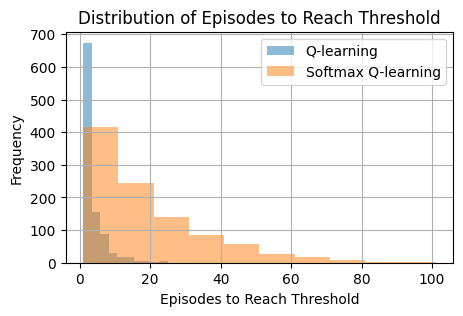

Q-Learning variance: 12.635676000000004
Softmax Q-Learning variance: 274.464316


In [8]:
reg_sim_ql, reg_sim_sql, ep_sim_ql, ep_sim_sql, Q_ql, Q_sql = run_algorithms(tau=tau)
plot_episodes(ep_sim_ql, ep_sim_sql)

Q-learning generally reaches the specified threshold in fewer episodes compared to Softmax Q-learning. The Softmax Q-learning distribution indicates variability in the number of episodes required to reach the threshold. Q-learning may be more effective in quickly reaching the reward threshold in this particular MDP setup. On the other hand, Softmax Q-learning seems to require more episodes on average, which could be due to it exploring more of the state-action space before finding an optimal or near-optimal policy.

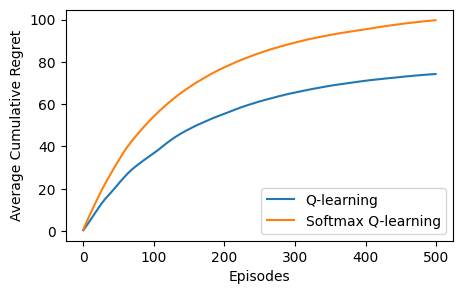

In [9]:
plot_regret(reg_sim_ql, reg_sim_sql)

In the early episodes, Softmax Q-learning appears to accumulate regret more rapidly than Q-learning. This could be due to its exploratory nature; the algorithm is trying out different actions to learn more about the environment, which can initially lead to choices that are suboptimal. As the number of episodes increases, the rate at which Softmax Q-learning accumulates regret seems to slow down relative to Q-learning. This suggests that the exploration conducted early on might be paying off over time as the algorithm starts to exploit the better-understood action values. Q-learning starts with lower regret, which may indicate that it's able to exploit its knowledge of the environment more effectively from the start. However, its regret continues to grow at a steady rate, possibly because it does not explore as much and may get stuck with a suboptimal policy if the environment is complex or has certain traps. The plot suggests that for environments where the optimal policy needs to be learned quickly, Q-learning might be more suitable. In contrast, Softmax Q-learning could be more appropriate for environments where the reward structure is complex, and initial exploration can lead to discovering better policies in the long run.

## Part b

First, let's define a function that takes a policy (in the form of a Q-function) and evaluates its expected value in the true MDP:

In [10]:
def evaluate_policy(finite_mdp, policy, num_episodes=500):
    total_reward = 0
    for _ in range(num_episodes):
        finite_mdp.ResetState()
        episode_reward = 0
        for _ in range(finite_mdp.H):
            current_state = finite_mdp.state
            action = policy[current_state]
            _, reward = finite_mdp.Play(action)
            episode_reward += reward
        total_reward += episode_reward
    average_reward = total_reward / num_episodes
    return average_reward

In [11]:
Q_learning_policy = np.argmax(Q_ql[-1][0], axis=1) # Q policies from the algorithms
Softmax_Q_learning_policy = np.argmax(Q_sql[-1][0], axis=1)
random_MDP = random_env(S, A, H)
AddExtraAttributes(random_MDP)

Q_learning_value = evaluate_policy(random_MDP, Q_learning_policy)
Softmax_Q_learning_value = evaluate_policy(random_MDP, Softmax_Q_learning_policy)

Q_learning_above_threshold = Q_learning_value >= tau
Softmax_Q_learning_above_threshold = Softmax_Q_learning_value >= tau
print(f"Q_Learning value: {Q_learning_value}, Q_learning_above_threshold: {Q_learning_above_threshold}")
print(f"Q_Learning value: {Softmax_Q_learning_value}, Q_learning_above_threshold: {Softmax_Q_learning_above_threshold}")

Q_Learning value: 2.6226704080985357, Q_learning_above_threshold: False
Q_Learning value: 3.0162696198400663, Q_learning_above_threshold: True


## Part c

Average reward expected per step multiplied by the horizon $H$: if we assume the rewards are uniformly distributed in [0,1], then $\tau = 0.5 \times 4 = 2$ would represent achieving average performance:

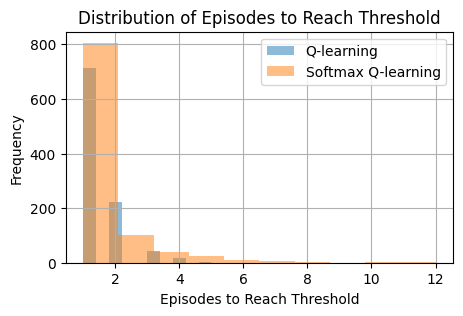

Q-Learning variance: 0.44483900000000004
Softmax Q-Learning variance: 1.753791


In [12]:
reg_sim_ql, reg_sim_sql, ep_sim_ql, ep_sim_sql, Q_ql, Q_sql = run_algorithms(tau=2)
plot_episodes(ep_sim_ql, ep_sim_sql)

Q-learning often requires only 1 episode to reach the threshold. The frequency rapidly declines for more episodes, suggesting that Q-learning quickly finds a policy that achieves the threshold. The Softmax Q-learning has a more even distribution, with the majority of instances requiring 2 to 5 episodes to reach the threshold. Q-learning reaches the threshold more consistently in fewer episodes compared to Softmax Q-learning. This might indicate that Q-learning is quicker to exploit and consolidate gains from its exploration, whereas Softmax Q-learning, with its inherent exploration bias, may take longer to find a similarly effective policy.

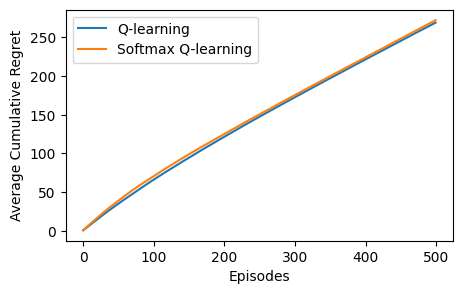

In [13]:
plot_regret(reg_sim_ql, reg_sim_sql)

Since the lines are almost indistinguishable, it suggests that both algorithms, on average, perform similarly in terms of regret over the long term. The close convergence of the two algorithms suggests that, at least in terms of regret, the exploration conducted by Softmax Q-learning and the exploitation focus of Q-learning yield similar results.

Higher threshold than the average pushing the algorithms to find better-than-average policies: the maximum reward per step is $1$, an optimistic threshold might be $\tau = 0.75 \times 4 = 3$:

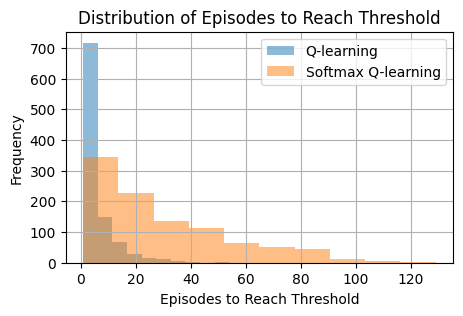

Q-Learning variance: 41.89761599999999
Softmax Q-Learning variance: 642.637975


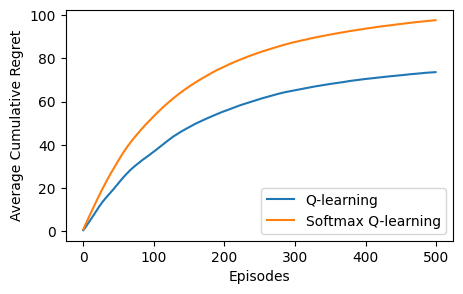

In [14]:
reg_sim_ql, reg_sim_sql, ep_sim_ql, ep_sim_sql, Q_ql, Q_sql = run_algorithms(tau=3)
plot_episodes(ep_sim_ql, ep_sim_sql)
plot_regret(reg_sim_ql, reg_sim_sql)

Here, expectedly, the results are similar to the initial run with $tau = 2.84$.

Lower threshold than the average testing the algorithms' ability to avoid poor policies: a pessimistic threshold might be $\tau = 0.25 \times 4 = 1$:

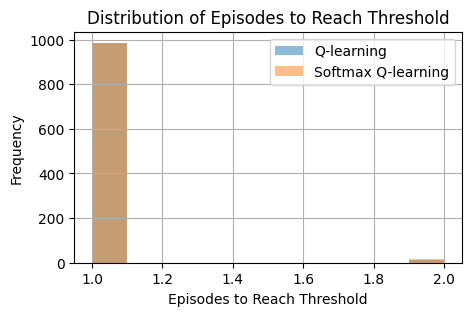

Q-Learning variance: 0.013803999999999999
Softmax Q-Learning variance: 0.016711


In [15]:
reg_sim_ql, reg_sim_sql, ep_sim_ql, ep_sim_sql, Q_ql, Q_sql = run_algorithms(tau=1)
plot_episodes(ep_sim_ql, ep_sim_sql)

A large proportion of simulations for both algorithms achieve the threshold within the first episode. Since the bars overlap entirely at 1 episode, it indicates that, with respect to the threshold used in these simulations, both algorithms perform identically in terms of the speed to reach the threshold.

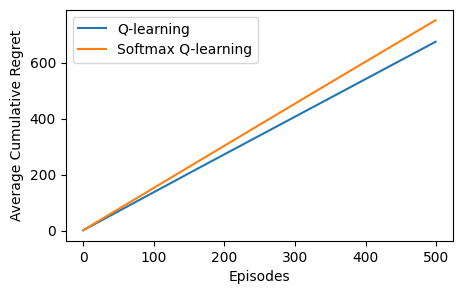

In [16]:
plot_regret(reg_sim_ql, reg_sim_sql)

The regret curves for both algorithms are quite close to each other throughout the episode range snd they are both linear. However, it seems that the Softmax Q-learning has a slightly higher cumulative regret overall compared to Q-learning. This suggests that Softmax Q-learning might be exploring more or converging slower compared to Q-learning, which tends to be more exploitative and might converge more quickly to a policy with less regret in this scenario. The closeness of the two curves suggests that, in the long run, both algorithms may be converging towards similar policies, with the difference being the rate at which they do so.

In practical scenarios, the choice of $\tau$ could be driven by domain-specific requirements or performance benchmarks that define successful operation within the environment. For instance, in a game, $\tau$ might be set to a score that distinguishes between novice and skilled players. In robotics, it could be the minimum efficiency needed for a task to be considered viable. The initial guess of setting the threshold as mean fraction of the optimal value, or a fraction of that but still close to that value, seems to be a reasonable choice, given the experiemnts we observed. If a threshold is set too low the algorithm might not differentiate between effective and ineffective policies, leading to overestimating the performance of your algorithms. Conversely, a threshold set unrealistically high might be unachievable, leading to underestimating the algorithms' capabilities or prolonged training times without convergence.

## Part d

If the regret up to episode $T$ is bounded by $\alpha_T$ with probability greater than $1 - \delta$ for some policy, it can be used to give a bound on the new performance measure for the same policy and a threshold that depends on $\alpha_T$. Let $V^{*}(x_1)$ be the optimal value starting from the initial state $x_1$. The regret up to episode T is defined as $Regret(T) = T  V^{*}(x_1) - \sum_{t=1}^T V_t(x_1)$, where $V_t(x_1)$ is the expected value of the policy at episode t, starting from the initial state $x_1$. The regret is bounded by $\alpha_T$ with probability greater than $1 - \delta$, so it follows:
$$
P(Regret(T) ≤ \alpha_T) > 1 - \delta, \text{ or}
P(T  V^{*}(x_1) - \sum_{t=1}^T V_t(x_1) \leq \alpha_T) > 1 - \delta, \text{ or}
P(\sum_{t=1}^T V_t(x_1) ≥ T V^{*}(x_1) - \alpha_T) > 1 - \delta.
$$
Let the threshold $\tau$ be $\tau = V^{*}(x_1) - \alpha_T / T$. If we consider the new performance measure, which is the number of episodes until we find a policy with value greater than or equal to the threshold τ, we can provide a bound. With probability greater than 1 - δ, the average value of the policy over T episodes will be at least τ: $P((1/T) \sum_{t=1}^T V_t(x_1) \geq \tau) > 1 - \delta$ Or, with probability greater than $1 - \delta$, the policy will have an average value greater than or equal to the threshold $\tau$ within T episodes.